In [1]:
#! /usr/bin/python
# -*- coding: utf-8 -*-
# ~.py

# Version: 2018.11.29.01

# Requiered libraries
import sys, os, math, time
import numpy as np
import scipy.linalg as cpy
import matplotlib.pyplot as plt
from numba import jit, njit, prange

In [2]:
@njit()
def g(x):
    return np.sin(math.pi*x)

@njit()
def crank_nicolson(X,T,u,alpha):
    for ii in range(1,T):
        for jj in prange(1,X):
            u[ii,jj] = alpha*u[ii-1,jj-1] + (1.-2.*alpha)*u[ii-1,jj] + alpha*u[ii-1,jj+1]
        
        u[ii] = u[ii-1].copy()
        D = (1.+2.*alpha) * np.ones(X-1)
        off = -alpha * np.ones(X-2)

        for jj in range(1,X-1):
            off[jj-1] /= D[jj-1]
            u[ii,jj] /= D[jj-1]
            D[jj-1] = 1.
            
            u[ii,jj+1] += u[ii,jj]*alpha
            D[jj] += off[jj-1]*alpha
        
        u[ii,X-1] /= D[X-2]
        D[X-2] = 1.
        for jj  in range(N-1,1,-1):
            u[ii,jj-1] -= u[ii,jj] * off[jj-2]

    return u

In [3]:
N = 10
dt = 5e-3
T = 3

u = np.zeros((T,N+1), np.double)
(x,dx) = np.linspace(0,1,N+1, retstep=True)
alpha = dt/dx**2
u[0,:] = g(x)
u[0,0] = u[0,-1] = 0.
print("alpha =\n",alpha)
print("x =\n",x)
print("u[0] =\n",u[0,:])

alpha =
 0.4999999999999999
x =
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
u[0] =
 [0.         0.30901699 0.58778525 0.80901699 0.95105652 1.
 0.95105652 0.80901699 0.58778525 0.30901699 0.        ]


In [4]:
t0 = time.time()
sol = crank_nicolson(N,T,u,alpha)
t1 = time.time()
print(t1-t0)
print("Explicit0 =\n",sol[0,:])
print("Explicit1 =\n",sol[1,:])
print("Explicitn =\n",sol[-1,:])

0.4542241096496582
Explicit0 =
 [0.         0.30901699 0.58778525 0.80901699 0.95105652 1.
 0.95105652 0.80901699 0.58778525 0.30901699 0.        ]
Explicit1 =
 [0.         0.29459833 0.56035932 0.77126843 0.90668042 0.95334021
 0.90668042 0.77126843 0.56035932 0.29459833 0.        ]
Explicitn =
 [0.         0.28085243 0.53421307 0.73528121 0.8643749  0.90885755
 0.8643749  0.73528121 0.53421307 0.28085243 0.        ]


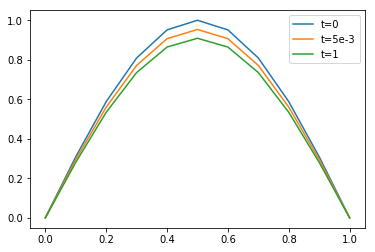

In [5]:
#%matplotlib qt
plt.plot(x,sol[0,:], '-', label = "t=0")
plt.plot(x,sol[1,:], '-', label = "t=5e-3")
plt.plot(x,sol[-1,:], '-', label = "t=1")
plt.legend(loc='best')
plt.show()

In [6]:
print(sol)

[[0.         0.30901699 0.58778525 0.80901699 0.95105652 1.
  0.95105652 0.80901699 0.58778525 0.30901699 0.        ]
 [0.         0.29459833 0.56035932 0.77126843 0.90668042 0.95334021
  0.90668042 0.77126843 0.56035932 0.29459833 0.        ]
 [0.         0.28085243 0.53421307 0.73528121 0.8643749  0.90885755
  0.8643749  0.73528121 0.53421307 0.28085243 0.        ]]
